In [165]:
%matplotlib inline
%config IPCompleter.greedy=True

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

In [166]:
# Each image is 28 pixels in height and 28 pixels in width
# total of 784 pixels

In [167]:
test = pd.read_csv("../../data/digitrecognizer/test.csv")
train = pd.read_csv("../../data/digitrecognizer/train.csv")

In [168]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


(None, None)

In [169]:
# split label and feature data
train_labels = (train['label'])
train_features = (train.iloc[:, 1:].values).astype('float32')
test_features = (test.values).astype('int32')

In [170]:
# reshape into pixel dimensions and 1 column for gray scale
train_features = train_features.reshape(train_features.shape[0], 28, 28, 1)
test_features = test_features.reshape(test_features.shape[0], 28, 28, 1)
train_features.shape, test_features.shape, train_labels.shape

((42000, 28, 28, 1), (28000, 28, 28, 1), (42000,))

In [171]:
# display sample digits 
for i in range(16, 7):
    plt.subplot(330 + (i+1))
    plt.imshow(train_features[i], cmap=plt.get_cmap('gray'))
    plt.title(train_labels[i]);

plt.show()

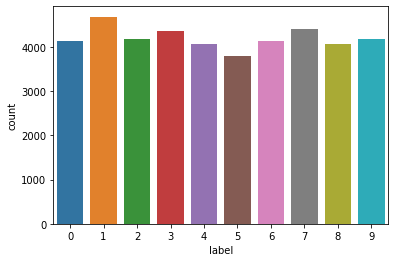

In [172]:
g = sns.countplot(train_labels)

In [173]:
# normalisation of the data so its between 0 and 1
train_features = train_features.astype('float32')/255.
test_features = test_features.astype('float32')/255.

In [174]:
# convert the target labels to categorical 
train_labels = to_categorical(train_labels)

In [175]:
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.10, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (37800, 10), (4200, 10))

In [176]:
# setup the basic CNN
model = Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), 
                    activation='relu', 
                    input_shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [177]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-4), metrics=["accuracy"])

In [178]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1600)            

In [179]:
# fit the model 
batch_size = 128
num_classes = 10
epochs = 12

model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, Y_val))

Train on 37800 samples, validate on 4200 samples
Epoch 1/12
  128/37800 [..............................] - ETA: 2:04

InvalidArgumentError:  logits and labels must be broadcastable: logits_size=[128,10] labels_size=[5120,2]
	 [[node loss/dense_21_loss/softmax_cross_entropy_with_logits (defined at <ipython-input-179-3d180c8076ca>:10) ]] [Op:__inference_distributed_function_10311]

Function call stack:
distributed_function


In [ ]:
loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
history_dict = history.history

In [ ]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
predict=model.predict(test_features)
print(predict)